In [57]:
from sklearn import datasets # 引入sklearn裏頭的資料集
import pandas as pd # 引入Pandas
-
from sklearn.preprocessing import StandardScaler
import scipy.stats as st
from statsmodels.stats.outliers_influence import variance_inflation_factor  #看兩者共線性 
data = datasets.load_boston() # 取得波士頓房價的數據
df_data = pd.DataFrame(data.data,columns = data.feature_names) # 將數據以改成DataFrame的方式呈現

In [58]:
df_data["price"] = data.target

In [59]:

df_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [60]:
df_data = sm.add_constant(df_data)
#c = sm.OLS(df_data["price"].values.reshape(-1,1),df_data.iloc[:,[0,1,3,4,5,7,8,9,10,11,12]].values)
c = sm.OLS(df_data["price"].values.reshape(-1,1),df_data.iloc[:,:-1].values)

In [61]:
d = c.fit()
d.summary()
#最下面的表為residual 分析若為正態omnibus接近零prob(omnibus)接近一 jb接近零 prob(jb)接近一 jb test原假設為正態分佈
# 希望dw test 在1 和 2之間表示獨立性

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 25 May 2021   Prob (F-statistic):          6.72e-135
Time:                        00:13:18   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
x1            -0.1080      0.033     -3.287      0.001      -0.173      -0.043
x2             0.0464      0.014      3.382      0.001       0.019       0.073
x3             0.0206      0.061      0.334      0.738      -0.100       0.141
x4             2.6867      0.862      3.118      0.002       0.994       4.380
x5           -17.7666      3.820     -4.651      0.000     -25.272     -10.262
x6             3.8099      0.418      9.116      0.000       2.989       4.631
x7             0.0007      0.013      0.052      0.958      -0.025       0.027
x8            -1.4756      0.199     -7.398      0.000      -1.867      -1.084
x9             0.3060      0.066      4.613      0.000       0.176       0.436
x10           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
x11           -0.9527      0.131     -7.283      0.000      -1.210      -0.696
x12            0.0093      0.003      3.467      0.001       0.004       0.015
x13           -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
d.ess  #ssr
d.ssr  #sse
d.mse_model # sse/model.df

2433.654679774215

In [7]:
df_data

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [8]:
#檢查共線性
# vif > 5 有共線性
# 高度貢獻沒有違反回歸假設
s = []
for x in range(len(df_data.columns)):
    s.append(variance_inflation_factor(df_data.values,x))
pd.Series(s,index = df_data.columns)

const      645.977937
CRIM         1.831537
ZN           2.352186
INDUS        3.992503
CHAS         1.095223
NOX          4.586920
RM           2.260374
AGE          3.100843
DIS          4.396007
RAD          7.808198
TAX          9.205542
PTRATIO      1.993016
B            1.381463
LSTAT        3.581585
price        3.855684
dtype: float64

ShapiroResult(statistic=0.9013804793357849, pvalue=1.480129525706051e-17)

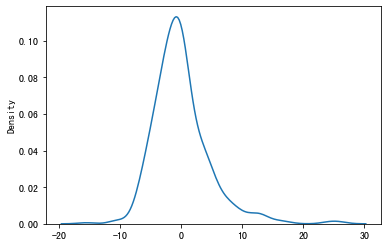

In [9]:
import seaborn as sns
sns.kdeplot(d.resid)
st.shapiro(d.resid)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
data = datasets.load_boston() # 取得波士頓房價的數據
df_data = pd.DataFrame(data.data,columns = data.feature_names) 
sc = StandardScaler()
df_data["price"] = data.target
lm = LinearRegression(normalize=True)
lm.fit(df_data.iloc[:,:-1].values,df_data["price"].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [12]:
lm.coef_

array([[-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
         2.68673382e+00, -1.77666112e+01,  3.80986521e+00,
         6.92224640e-04, -1.47556685e+00,  3.06049479e-01,
        -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]])

In [13]:
st.levene(df_data["CRIM"],df_data["ZN"],center="median")

LeveneResult(statistic=50.496051677380144, pvalue=2.2533133579786568e-12)

In [14]:
import numpy as np
pd.DataFrame(np.cov(df_data.T),columns = df_data.columns,index = df_data.columns)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,73.986578,-40.215956,23.992339,-0.122109,0.419594,-1.325038,85.405322,-6.876722,46.847761,844.821538,5.399331,-302.381816,27.986168,-30.718508
ZN,-40.215956,543.936814,-85.412648,-0.252925,-1.396148,5.112513,-373.901548,32.629304,-63.348695,-1236.453735,-19.776571,373.721402,-68.783037,77.315176
INDUS,23.992339,-85.412648,47.064442,0.109669,0.607074,-1.887957,124.513903,-10.228097,35.549971,833.360290,5.692104,-223.579756,29.580270,-30.520823
CHAS,-0.122109,-0.252925,0.109669,0.064513,0.002684,0.016285,0.618571,-0.053043,-0.016296,-1.523367,-0.066819,1.131325,-0.097816,0.409409
NOX,0.419594,-1.396148,0.607074,0.002684,0.013428,-0.024603,2.385927,-0.187696,0.616929,13.046286,0.047397,-4.020570,0.488946,-0.455412
RM,-1.325038,5.112513,-1.887957,0.016285,-0.024603,0.493671,-4.751929,0.303663,-1.283815,-34.583448,-0.540763,8.215006,-3.079741,4.493446
AGE,85.405322,-373.901548,124.513903,0.618571,2.385927,-4.751929,792.358399,-44.329379,111.770846,2402.690122,15.936921,-702.940328,121.077725,-97.589017
DIS,-6.876722,32.629304,-10.228097,-0.053043,-0.187696,0.303663,-44.329379,4.434015,-9.068252,-189.664592,-1.059775,56.040356,-7.473329,4.840229
RAD,46.847761,-63.348695,35.549971,-0.016296,0.616929,-1.283815,111.770846,-9.068252,75.816366,1335.756577,8.760716,-353.276219,30.385442,-30.561228
TAX,844.821538,-1236.453735,833.360290,-1.523367,13.046286,-34.583448,2402.690122,-189.664592,1335.756577,28404.759488,168.153141,-6797.911215,654.714520,-726.255716


In [15]:
df_data = sm.add_constant(df_data)
# indus nox rm tax ptratio lstat
model = sm.OLS(df_data.iloc[:,-1].values.reshape(-1,1),df_data.loc[:,["const","RM","PTRATIO","LSTAT"]].values.reshape(-1,4)).fit()

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     353.3
Date:                Mon, 24 May 2021   Prob (F-statistic):          2.69e-123
Time:                        22:30:13   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     502   BIC:                             3131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.5671      3.913      4.745      0.000      10.879      26.255
x1             4.5154      0.426     10.603      0.000       3.679       5.352
x2            -0.9307      0.118     -7.911      0.000      -1.162      -0.700
x3            -0.5718      0.042    -13.540      0.000      -0.655      -0.489
==============================================================================
Omnibus:                      202.072   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1022.153
Skew:                           1.700   Prob(JB):                    1.10e-222
Kurtosis:                       9.076   Cond. No.                         402.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
st.shapiro(model.resid)

ShapiroResult(statistic=0.8880380392074585, pvalue=1.035920880901703e-18)

In [19]:
s = pd.DataFrame([[1,40,385],[2,20,275],[3,25,300],[4,20,295],[5,30,360],[6,50,440],[7,20,320],[8,40,500],[9,50,530],[10,25,340],[11,35,410],[12,40,450]])
s

,0,1,2
0,1,40,385
1,2,20,275
2,3,25,300
3,4,20,295
4,5,30,360
5,6,50,440
6,7,20,320
7,8,40,500
8,9,50,530
9,10,25,340


In [22]:
model = sm.OLS(s[2].values.reshape(-1,1),s[1].values.reshape(-1,1)).fit()
model.summary()

/Users/xuzhejia/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              452.7
Date:                Mon, 24 May 2021   Prob (F-statistic):                    2.75e-10
Time:                        22:35:07   Log-Likelihood:                         -66.233
No. Observations:                  12   AIC:                                      134.5
Df Residuals:                      11   BIC:                                      135.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            11.1896      0.526     21.277      0.000      10.032      12.347
==============================================================================
Omnibus:                        3.426   Durbin-Watson:                   2.391
Prob(Omnibus):                  0.180   Jarque-Bera (JB):                1.606
Skew:                          -0.895   Prob(JB):                        0.448
Kurtosis:                       3.104   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

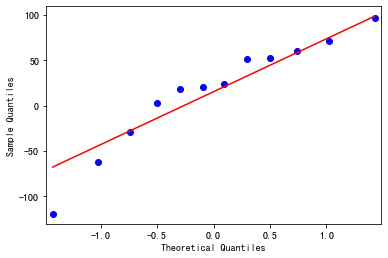

In [87]:
sm.qqplot(model.resid,line="s")
plt.show()

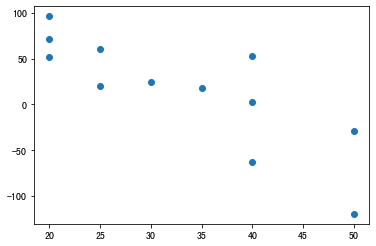

In [41]:
import matplotlib.pyplot as plt
plt.scatter(s[1].values,model.resid)

In [66]:
# white 檢驗 變異數同值測驗 虛無假設方差同值
print(sm.stats.diagnostic.het_white(d.resid, exog = d.model.exog))
# 同 white 檢驗
sm.stats.diagnostic.het_breuschpagan(d.resid, exog_het = d.model.exog)

(328.61243078779626, 2.266143007316372e-25, 7.230188729419651, 4.664584804430917e-48)


(65.1217861371618,
 6.265430719876455e-09,
 5.5902266417050015,
 1.4957755130734032e-09)